In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

import pandas
import csv
import matplotlib.pyplot as plt

#preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from numpy import mean
from numpy import std
import numpy as np
seed = 7
np.random.seed(seed)

# modelos
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import StackingClassifier

#guardar modelos
from sklearn.externals import joblib

#evaluacion
from sklearn.metrics import *


### Una vez preprocesado el dataset se debe ejecutar Training_Test_Data.py para crear 10 datasets para entrenamientos y test de cada modelo.

# Carga de datos

In [2]:
train_folds  = []
test_folds = []
for i in range(10):
    train = pandas.read_csv("train_"+ str(i) + ".csv", decimal=".")
    col_mask=train.isnull().any(axis=0) 
    row_mask=train.isnull().any(axis=1)
    train_folds.append(train.loc[-row_mask,-col_mask])
    test = pandas.read_csv("test_"+ str(i) + ".csv", decimal=".")
    col_mask=test.isnull().any(axis=0) 
    row_mask=test.isnull().any(axis=1)
    test_folds.append(test.loc[-row_mask,-col_mask])

# Carga de modelos para comparar su rendimiento

# Cost-sensitive  Naives

In [22]:
model_NC = []
recall_NC = []
recalln_NC =[]
fpr_NC = []
tpr_NC = []
auc_NC = []
for i in range(len(train_folds)):
    model = joblib.load('NC' + str(i) + '.pkl')
    model_NC.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall Naives " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_NC.append(recall)
    recalln_NC.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_NC.append(fpr)
    tpr_NC.append(tpr)
    auc_NC.append(auc)
print("mean Recall Naives " + str(i) + ": Positive -> " + str(mean(recall_NC)) +"\t Negative-> " + str(mean(recalln_NC)))

Recall Naives 0: Positive-> 0.3005050505050505	 Negative-> 0.8862768496420048
Recall Naives 1: Positive-> 0.19696969696969696	 Negative-> 0.9350835322195704
Recall Naives 2: Positive-> 0.3434343434343434	 Negative-> 0.89236276849642
Recall Naives 3: Positive-> 0.29582806573957016	 Negative-> 0.901909307875895
Recall Naives 4: Positive-> 0.3274336283185841	 Negative-> 0.9048926014319809
Recall Naives 5: Positive-> 0.25916561314791403	 Negative-> 0.904653937947494
Recall Naives 6: Positive-> 0.33122629582806573	 Negative-> 0.9034606205250597
Recall Naives 7: Positive-> 0.1959544879898862	 Negative-> 0.9260143198090692
Recall Naives 8: Positive-> 0.22853535353535354	 Negative-> 0.9279150256593865
Recall Naives 9: Positive-> 0.24242424242424243	 Negative-> 0.9157417352906074
mean Recall Naives 9: Positive -> 0.2721476777892707	 Negative-> 0.9098310698897489


# Cost-sensitive  RANDOM FOREST

In [26]:
model_RF = []
recall_RF = []
recalln_RF =[]
fpr_RF = []
tpr_RF = []
auc_RF = []
for i in range(len(train_folds)):
    model = joblib.load('RF' + str(i) + '.pkl')
    model_RF.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall Random Forest " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_RF.append(recall)
    recalln_RF.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_RF.append(fpr)
    tpr_RF.append(tpr)
    auc_RF.append(auc)
print("mean Recall Random Forest " + str(i) + ": Positive -> " + str(mean(recall_RF)) +"\t Negative-> " + str(mean(recalln_RF)))

Recall Random Forest 0: Positive-> 0.6439393939393939	 Negative-> 0.7301909307875895
Recall Random Forest 1: Positive-> 0.6325757575757576	 Negative-> 0.7229116945107399
Recall Random Forest 2: Positive-> 0.6628787878787878	 Negative-> 0.7305489260143198
Recall Random Forest 3: Positive-> 0.6245259165613148	 Negative-> 0.7440334128878282
Recall Random Forest 4: Positive-> 0.695322376738306	 Negative-> 0.6671837708830549
Recall Random Forest 5: Positive-> 0.6144121365360303	 Negative-> 0.7325775656324582
Recall Random Forest 6: Positive-> 0.6637168141592921	 Negative-> 0.736873508353222
Recall Random Forest 7: Positive-> 0.5853350189633375	 Negative-> 0.7585918854415274
Recall Random Forest 8: Positive-> 0.6035353535353535	 Negative-> 0.7443609022556391
Recall Random Forest 9: Positive-> 0.6565656565656566	 Negative-> 0.7110633727175081
mean Recall Random Forest 9: Positive -> 0.638280721245323	 Negative-> 0.7278335969483887


# Cost-sensitive SUPPORT VECTOR MACHINE

In [27]:
model_SVM = []
recall_SVM = []
recalln_SVM = []
fpr_SVM = []
tpr_SVM = []
auc_SVM = []
for i in range(len(train_folds)):
    model = joblib.load('SVM' + str(i) + '.pkl')
    model_SVM.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall SVM " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_SVM.append(recall)
    recalln_SVM.append(recalln)
    """
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_SVM.append(fpr)
    tpr_SVM.append(tpr)
    auc_SVM.append(auc)
    """
print("mean Recall SVM " + str(i) + ": Positive -> " + str(mean(recall_SVM)) +"\t Negative-> " + str(mean(recalln_SVM)))

Recall SVM 0: Positive-> 0.6136363636363636	 Negative-> 0.7878281622911695
Recall SVM 1: Positive-> 0.6212121212121212	 Negative-> 0.7677804295942721
Recall SVM 2: Positive-> 0.6717171717171717	 Negative-> 0.7523866348448688
Recall SVM 3: Positive-> 0.6599241466498104	 Negative-> 0.7542959427207637
Recall SVM 4: Positive-> 0.6940581542351454	 Negative-> 0.715035799522673
Recall SVM 5: Positive-> 0.6308470290771175	 Negative-> 0.7786396181384249
Recall SVM 6: Positive-> 0.6523388116308471	 Negative-> 0.7505966587112172
Recall SVM 7: Positive-> 0.5853350189633375	 Negative-> 0.7991646778042959
Recall SVM 8: Positive-> 0.5909090909090909	 Negative-> 0.7886382623224728
Recall SVM 9: Positive-> 0.6313131313131313	 Negative-> 0.7659625253610216
mean Recall SVM 9: Positive -> 0.6351291039344137	 Negative-> 0.7660328711311178


# Cost-sensitive  LOGISTIC REGRESSION

In [28]:
model_LR = []
recall_LR = []
recalln_LR = []
fpr_LR = []
tpr_LR = []
auc_LR = []

for i in range(len(train_folds)):
    model = joblib.load('LR' + str(i) + '.pkl')
    model_LR.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall Logistic Regression " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_LR.append(recall)
    recalln_LR.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_LR.append(fpr)
    tpr_LR.append(tpr)
    auc_LR.append(auc)
print("mean Recall SVM " + str(i) + ": Positive -> " + str(mean(recall_LR)) +"\t Negative-> " + str(mean(recalln_LR)))

Recall Logistic Regression 0: Positive-> 0.63510101010101	 Negative-> 0.6906921241050119
Recall Logistic Regression 1: Positive-> 0.6199494949494949	 Negative-> 0.7022673031026253
Recall Logistic Regression 2: Positive-> 0.6679292929292929	 Negative-> 0.6636038186157518
Recall Logistic Regression 3: Positive-> 0.6599241466498104	 Negative-> 0.6694510739856802
Recall Logistic Regression 4: Positive-> 0.6624525916561315	 Negative-> 0.6501193317422435
Recall Logistic Regression 5: Positive-> 0.6371681415929203	 Negative-> 0.6940334128878282
Recall Logistic Regression 6: Positive-> 0.6346396965865992	 Negative-> 0.6847255369928401
Recall Logistic Regression 7: Positive-> 0.5423514538558787	 Negative-> 0.729236276849642
Recall Logistic Regression 8: Positive-> 0.6123737373737373	 Negative-> 0.7151211361737677
Recall Logistic Regression 9: Positive-> 0.6047979797979798	 Negative-> 0.7218045112781954
mean Recall SVM 9: Positive -> 0.6276687545492855	 Negative-> 0.6921054525733586


# Decision Tree Classifier

In [31]:
model_DT= []
recall_DT = []
recalln_DT = []
fpr_DT = []
tpr_DT = []
auc_DT = []

for i in range(len(train_folds)):
    model = joblib.load('DT' + str(i) + '.pkl')
    model_DT.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall Decision Tree " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_DT.append(recall)
    recalln_DT.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_DT.append(fpr)
    tpr_DT.append(tpr)
    auc_DT.append(auc)
print("mean Recall Decision Tree " + str(i) + ": Positive -> " + str(mean(recall_DT)) +"\t Negative-> " + str(mean(recalln_DT)))

Recall Decision Tree 0: Positive-> 0.19570707070707072	 Negative-> 0.9236276849642004
Recall Decision Tree 1: Positive-> 0.21717171717171718	 Negative-> 0.9165871121718377
Recall Decision Tree 2: Positive-> 0.1919191919191919	 Negative-> 0.9200477326968973
Recall Decision Tree 3: Positive-> 0.22123893805309736	 Negative-> 0.9146778042959427
Recall Decision Tree 4: Positive-> 0.25663716814159293	 Negative-> 0.9071599045346062
Recall Decision Tree 5: Positive-> 0.20606826801517067	 Negative-> 0.9204057279236277
Recall Decision Tree 6: Positive-> 0.213653603034134	 Negative-> 0.9147971360381861
Recall Decision Tree 7: Positive-> 0.20733249051833122	 Negative-> 0.9230310262529833
Recall Decision Tree 8: Positive-> 0.19318181818181818	 Negative-> 0.9233798782670963
Recall Decision Tree 9: Positive-> 0.21843434343434343	 Negative-> 0.9121613557703784
mean Recall Decision Tree 9: Positive -> 0.2121344609176467	 Negative-> 0.9175875362915755


# knn

In [32]:
model_KNN = []
recall_KNN = []
recalln_KNN = []
fpr_KNN = []
tpr_KNN = []
auc_KNN = []

for i in range(len(train_folds)):
    model = joblib.load('KNN' + str(i) + '.pkl')
    model_KNN.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall knn " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_KNN.append(recall)
    recalln_KNN.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_KNN.append(fpr)
    tpr_KNN.append(tpr)
    auc_KNN.append(auc)
print("mean Recall Decision Tree " + str(i) + ": Positive -> " + str(mean(recall_KNN)) +"\t Negative-> " + str(mean(recalln_KNN)))

Recall knn 0: Positive-> 0.056818181818181816	 Negative-> 0.9963007159904534
Recall knn 1: Positive-> 0.03409090909090909	 Negative-> 0.9983293556085919
Recall knn 2: Positive-> 0.05176767676767677	 Negative-> 0.9963007159904534
Recall knn 3: Positive-> 0.05309734513274336	 Negative-> 0.9974940334128878
Recall knn 4: Positive-> 0.05815423514538559	 Negative-> 0.9959427207637231
Recall knn 5: Positive-> 0.03034134007585335	 Negative-> 0.9973747016706443
Recall knn 6: Positive-> 0.03413400758533502	 Negative-> 0.9990453460620525
Recall knn 7: Positive-> 0.0316055625790139	 Negative-> 0.9982100238663485
Recall knn 8: Positive-> 0.03535353535353535	 Negative-> 0.9985678481919084
Recall knn 9: Positive-> 0.06186868686868687	 Negative-> 0.9970163503998091
mean Recall Decision Tree 9: Positive -> 0.04472314804173211	 Negative-> 0.9974581811956872


# Stochastic Gradient Boosting

In [33]:
model_SGB = []
recall_SGB = []
recalln_SGB = []
fpr_SGB = []
tpr_SGB = []
auc_SGB = []

for i in range(len(train_folds)):
    model = joblib.load('SGB' + str(i) + '.pkl')
    model_SGB.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall SGB " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_SGB.append(recall)
    recalln_SGB.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_SGB.append(fpr)
    tpr_SGB.append(tpr)
    auc_SGB.append(auc)
print("mean Recall SGB " + str(i) + ": Positive -> " + str(mean(recall_SGB)) +"\t Negative-> " + str(mean(recalln_SGB)))

Recall SGB 0: Positive-> 0.11363636363636363	 Negative-> 0.9936754176610979
Recall SGB 1: Positive-> 0.09974747474747475	 Negative-> 0.9957040572792363
Recall SGB 2: Positive-> 0.11868686868686869	 Negative-> 0.9924821002386635
Recall SGB 3: Positive-> 0.10998735777496839	 Negative-> 0.9943914081145585
Recall SGB 4: Positive-> 0.15170670037926676	 Negative-> 0.9905727923627685
Recall SGB 5: Positive-> 0.08596713021491782	 Negative-> 0.9926014319809069
Recall SGB 6: Positive-> 0.10240202275600506	 Negative-> 0.9949880668257757
Recall SGB 7: Positive-> 0.07711757269279393	 Negative-> 0.9957040572792363
Recall SGB 8: Positive-> 0.0845959595959596	 Negative-> 0.9951068146556868
Recall SGB 9: Positive-> 0.09974747474747475	 Negative-> 0.9931972789115646
mean Recall SGB 9: Positive -> 0.10435949252320934	 Negative-> 0.9938423425309495


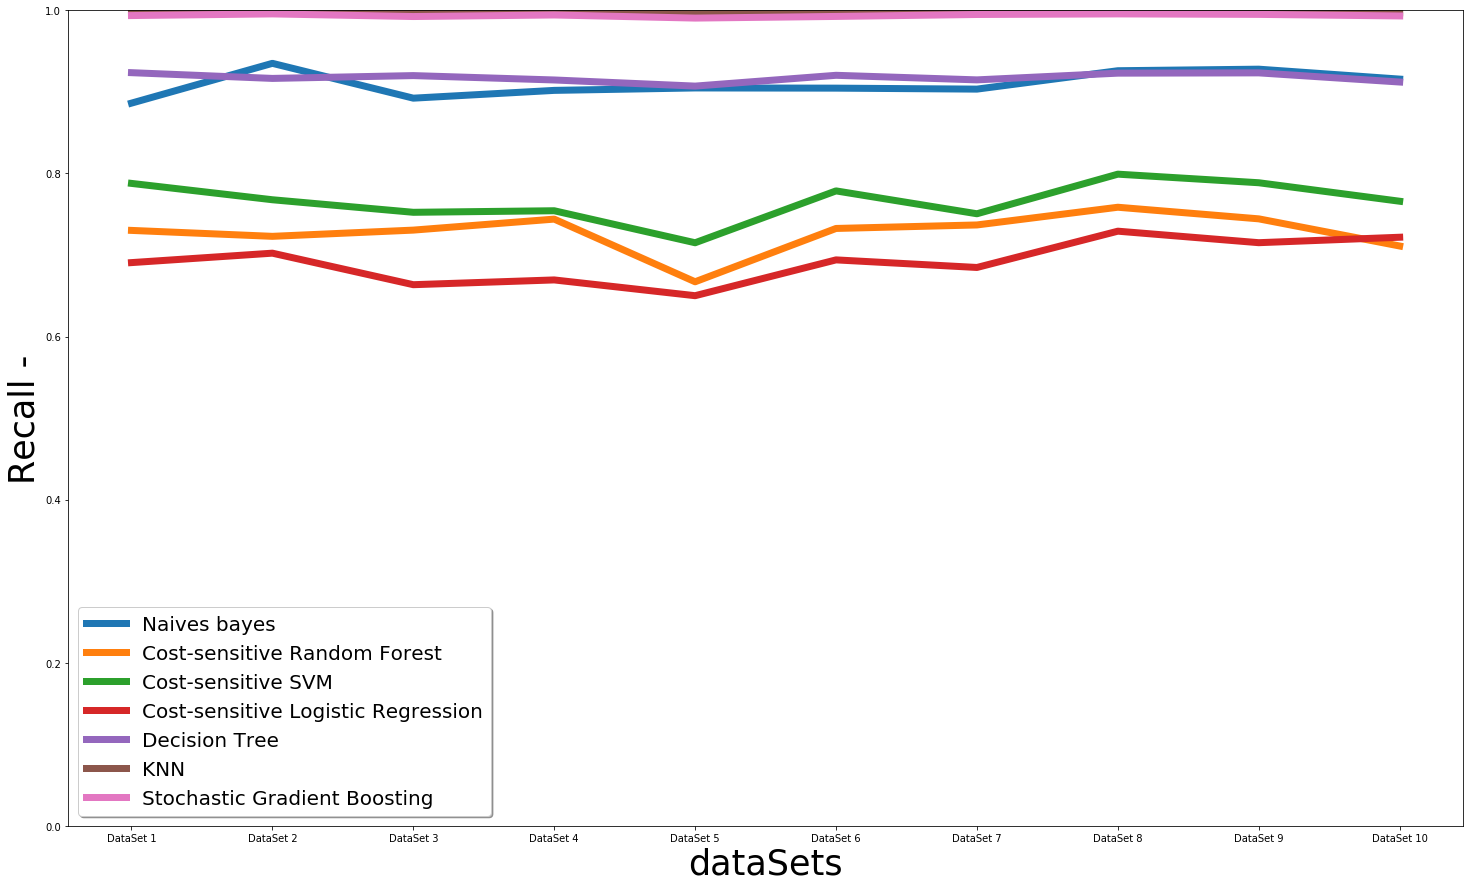

In [53]:
plt.rcParams['figure.figsize'] = [25, 15]
x = ["DataSet 1", "DataSet 2", "DataSet 3", "DataSet 4", "DataSet 5", "DataSet 6", "DataSet 7", "DataSet 8", "DataSet 9", "DataSet 10"]     
fig, ax = plt.subplots()
ax.set_ylabel('Recall -', fontsize=35)
ax.set_xlabel('dataSets', fontsize=35)
plt.ylim(0.00,1,0)
#ax.set_title('Desempeño de modelos', fontsize=60)
ax.plot(x, recalln_NC, label='Naives bayes',linewidth=7)
ax.plot(x, recalln_RF, label='Cost-sensitive Random Forest',linewidth=7)  
ax.plot(x, recalln_SVM, label='Cost-sensitive SVM',linewidth=7) 
ax.plot(x, recalln_LR, label='Cost-sensitive Logistic Regression',linewidth=7)
ax.plot(x, recalln_DT, label='Decision Tree',linewidth=7)
ax.plot(x, recalln_KNN, label='KNN',linewidth=7)
ax.plot(x, recalln_SGB, label='Stochastic Gradient Boosting',linewidth=7)
legend = ax.legend(loc='best', shadow=True, fontsize=20)
#legend.get_frame().set_facecolor('gray')
plt.show()

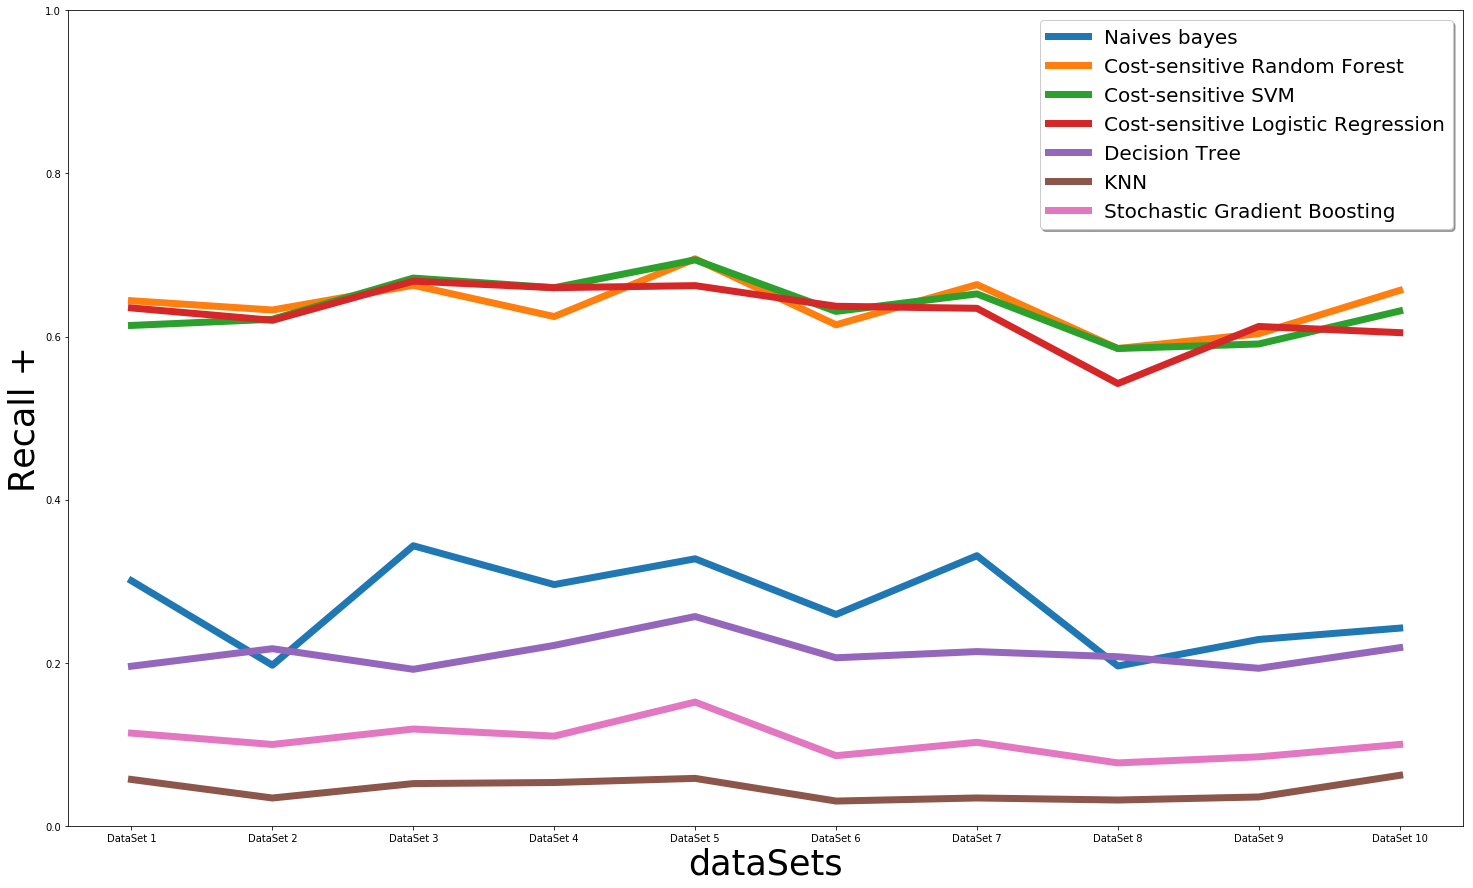

In [54]:
plt.rcParams['figure.figsize'] = [25, 15]
x = ["DataSet 1", "DataSet 2", "DataSet 3", "DataSet 4", "DataSet 5", "DataSet 6", "DataSet 7", "DataSet 8", "DataSet 9", "DataSet 10"]     
fig, ax = plt.subplots()
ax.set_ylabel('Recall +', fontsize=35)
plt.ylim(0.00,1,0)
ax.set_xlabel('dataSets', fontsize=35)
#ax.set_title('Desempeño de modelos', fontsize=60)
ax.plot(x, recall_NC, label='Naives bayes',linewidth=7)
ax.plot(x, recall_RF, label='Cost-sensitive Random Forest',linewidth=7)  
ax.plot(x, recall_SVM, label='Cost-sensitive SVM',linewidth=7) 
ax.plot(x, recall_LR, label='Cost-sensitive Logistic Regression',linewidth=7)
ax.plot(x, recall_DT, label='Decision Tree',linewidth=7)
ax.plot(x, recall_KNN, label='KNN',linewidth=7)
ax.plot(x, recall_SGB, label='Stochastic Gradient Boosting',linewidth=7)
legend = ax.legend(loc='best', shadow=True, fontsize=20)
#legend.get_frame().set_facecolor('gray')
plt.show()

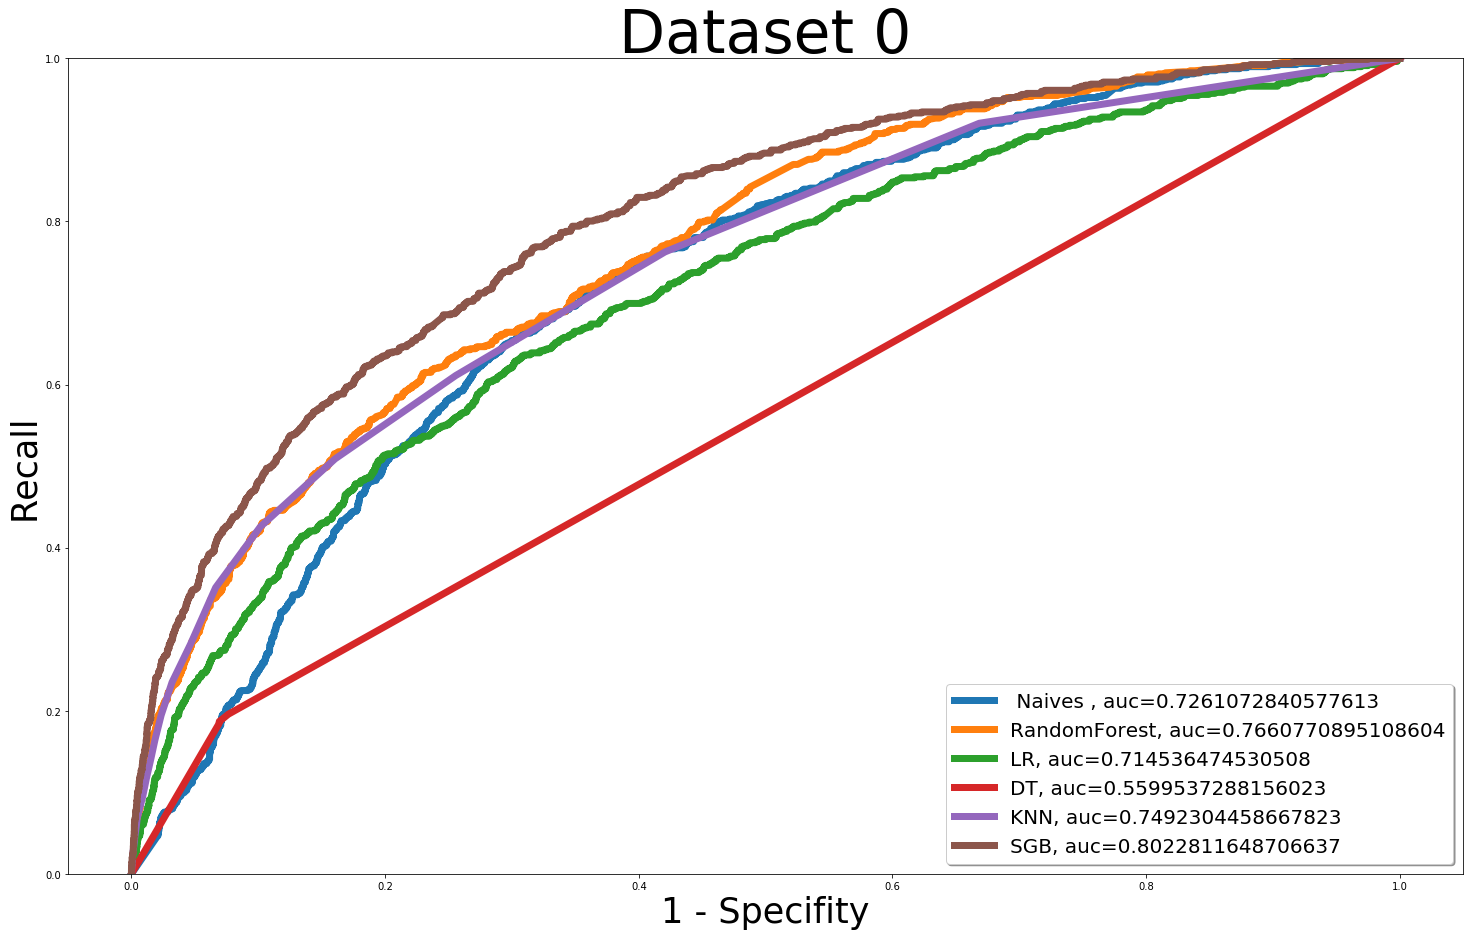

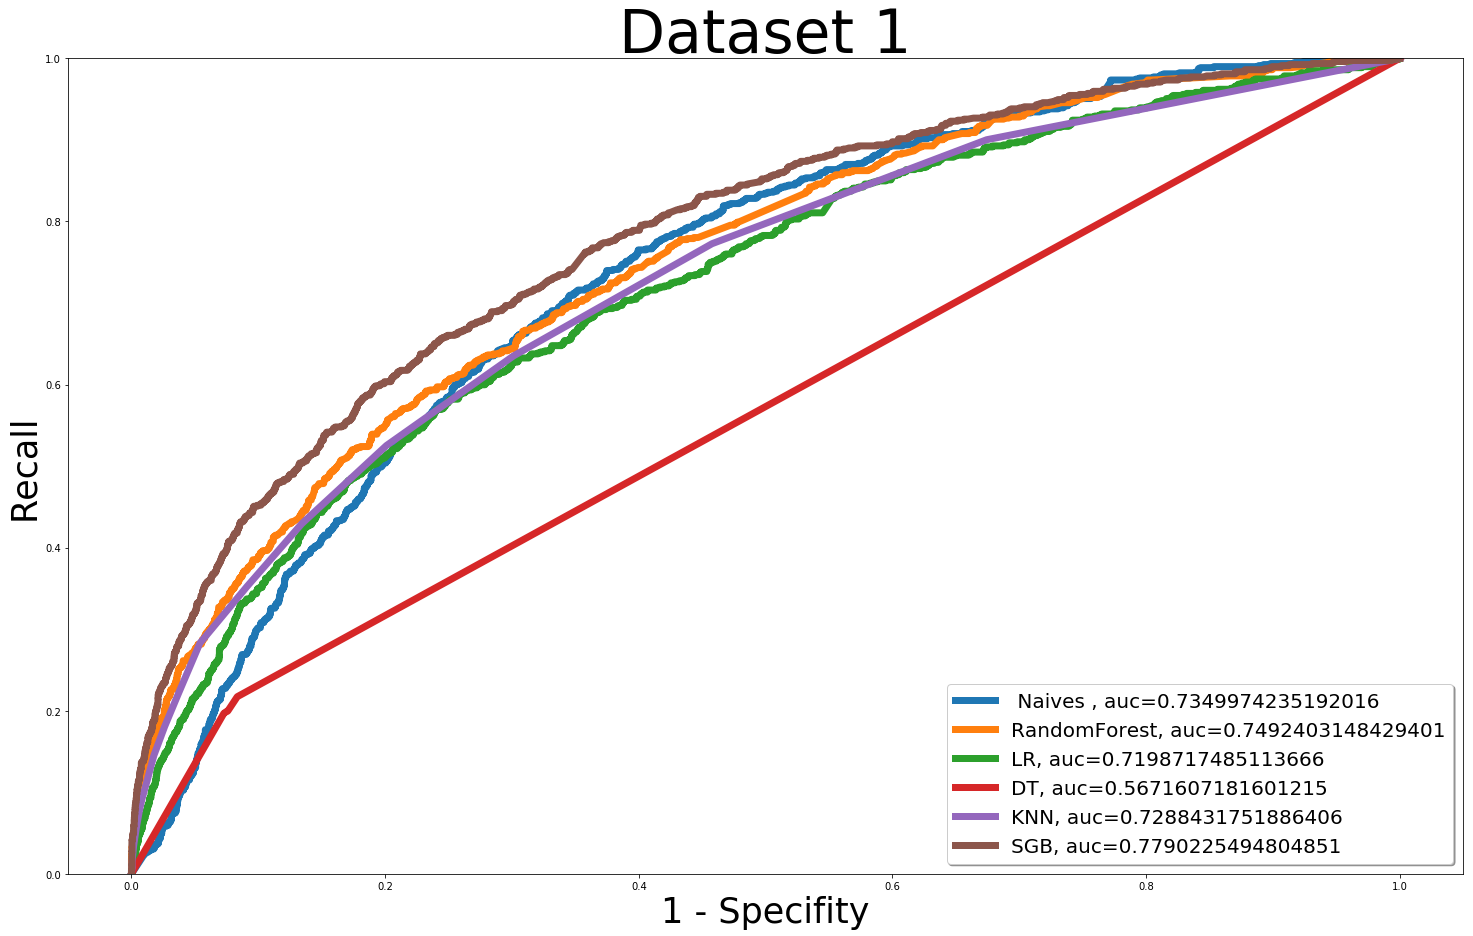

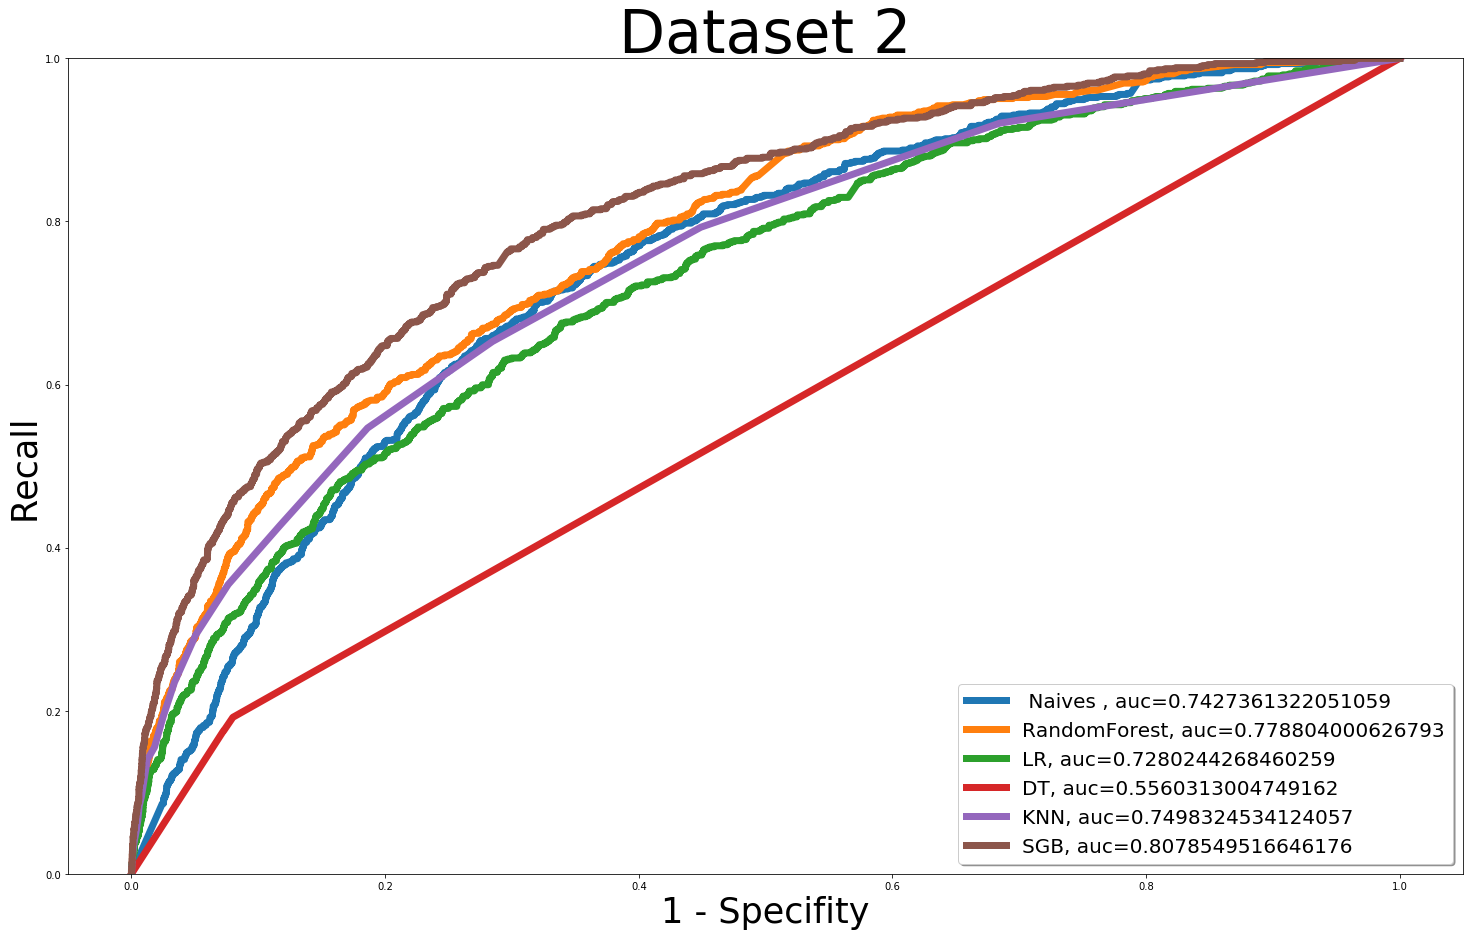

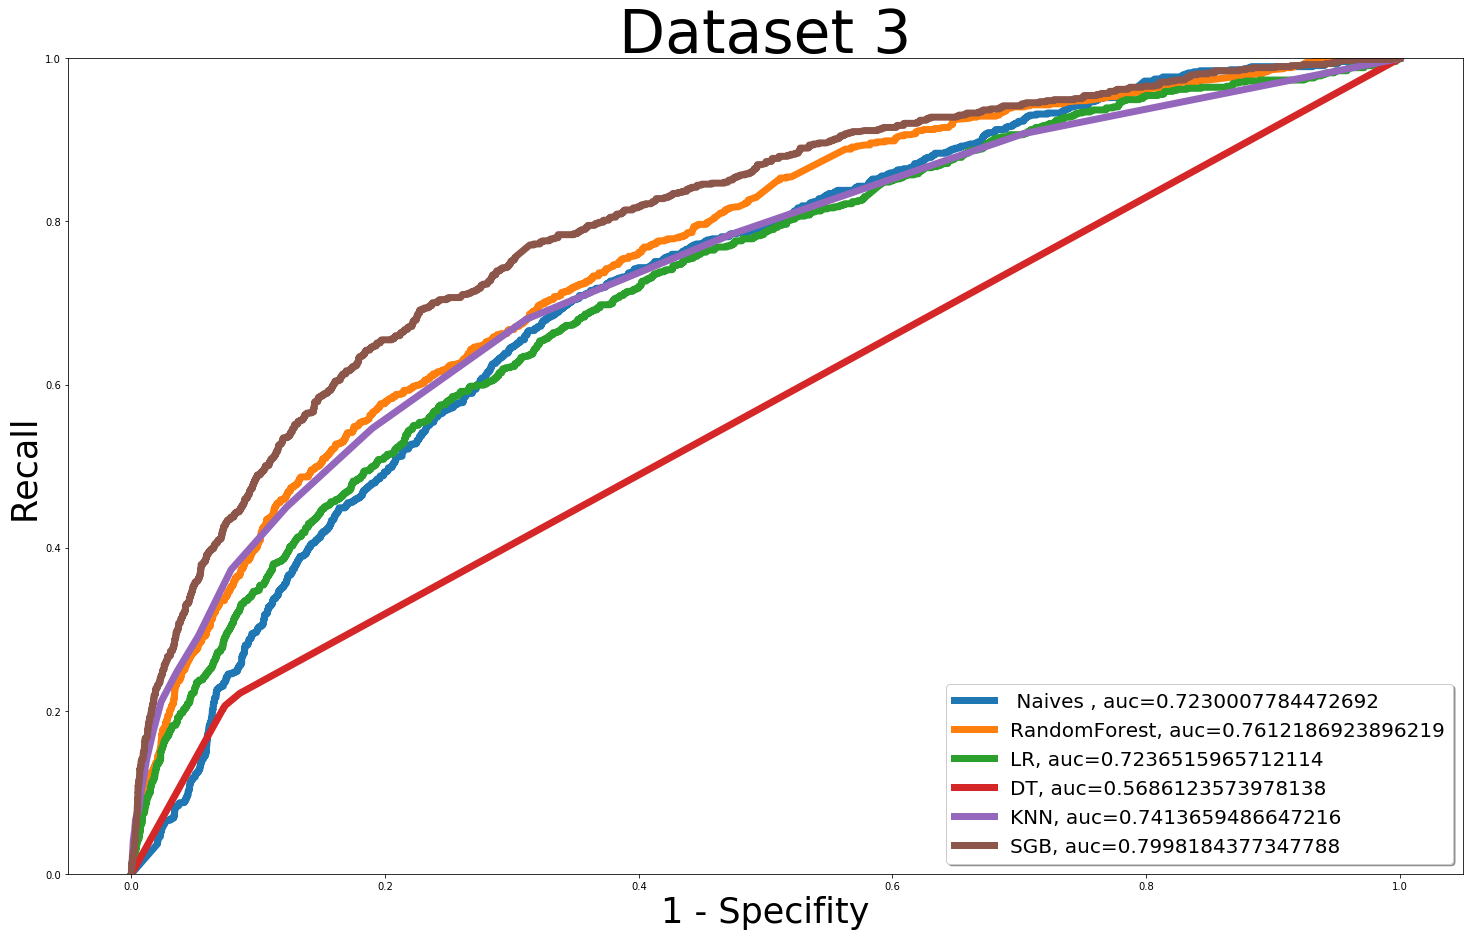

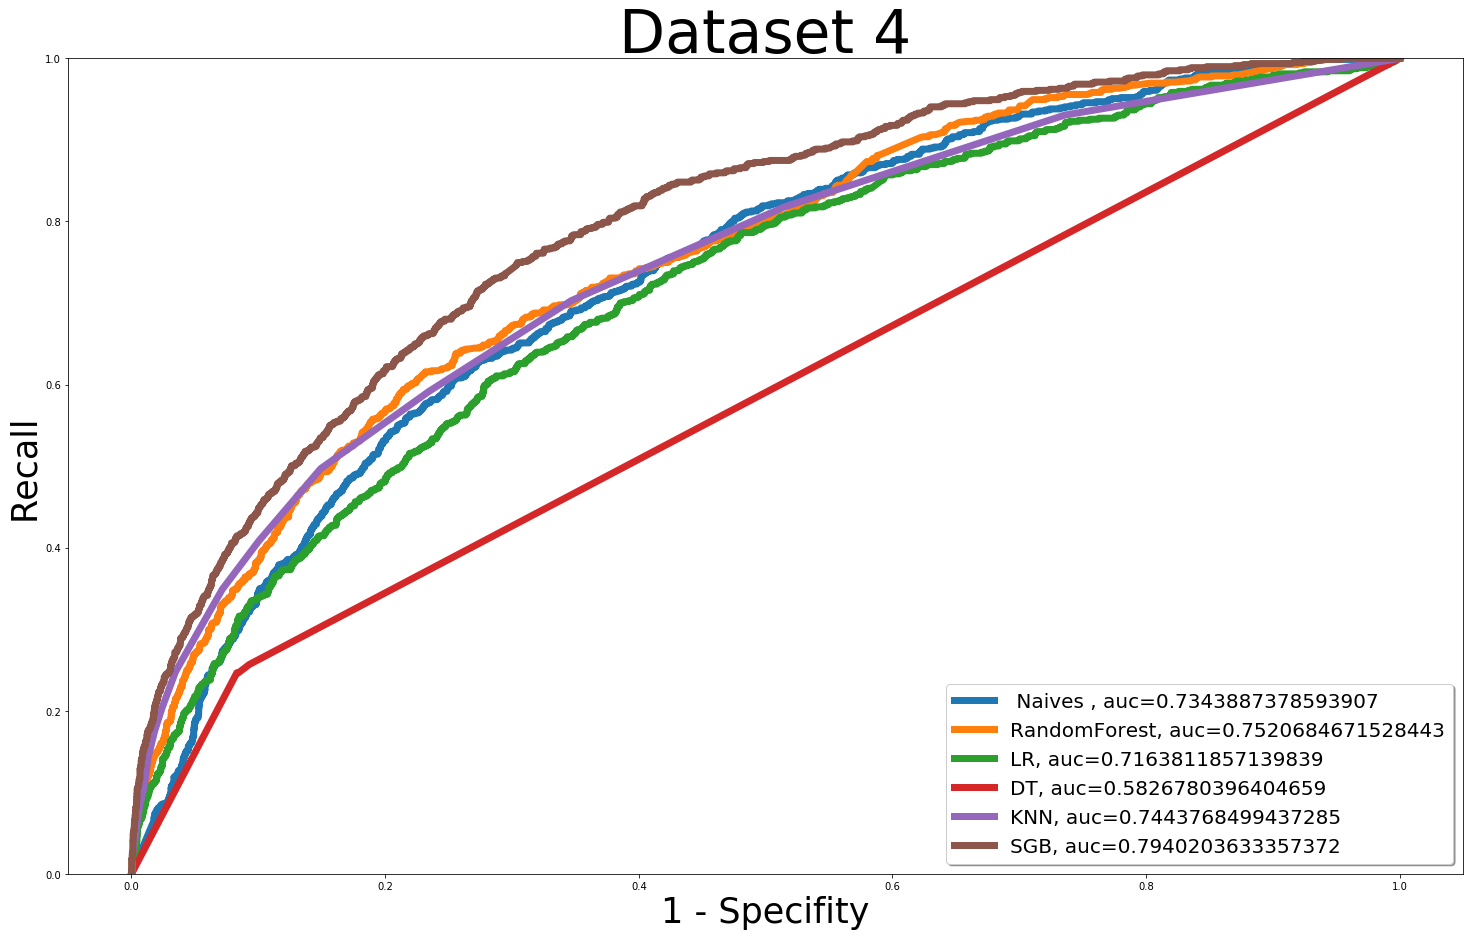

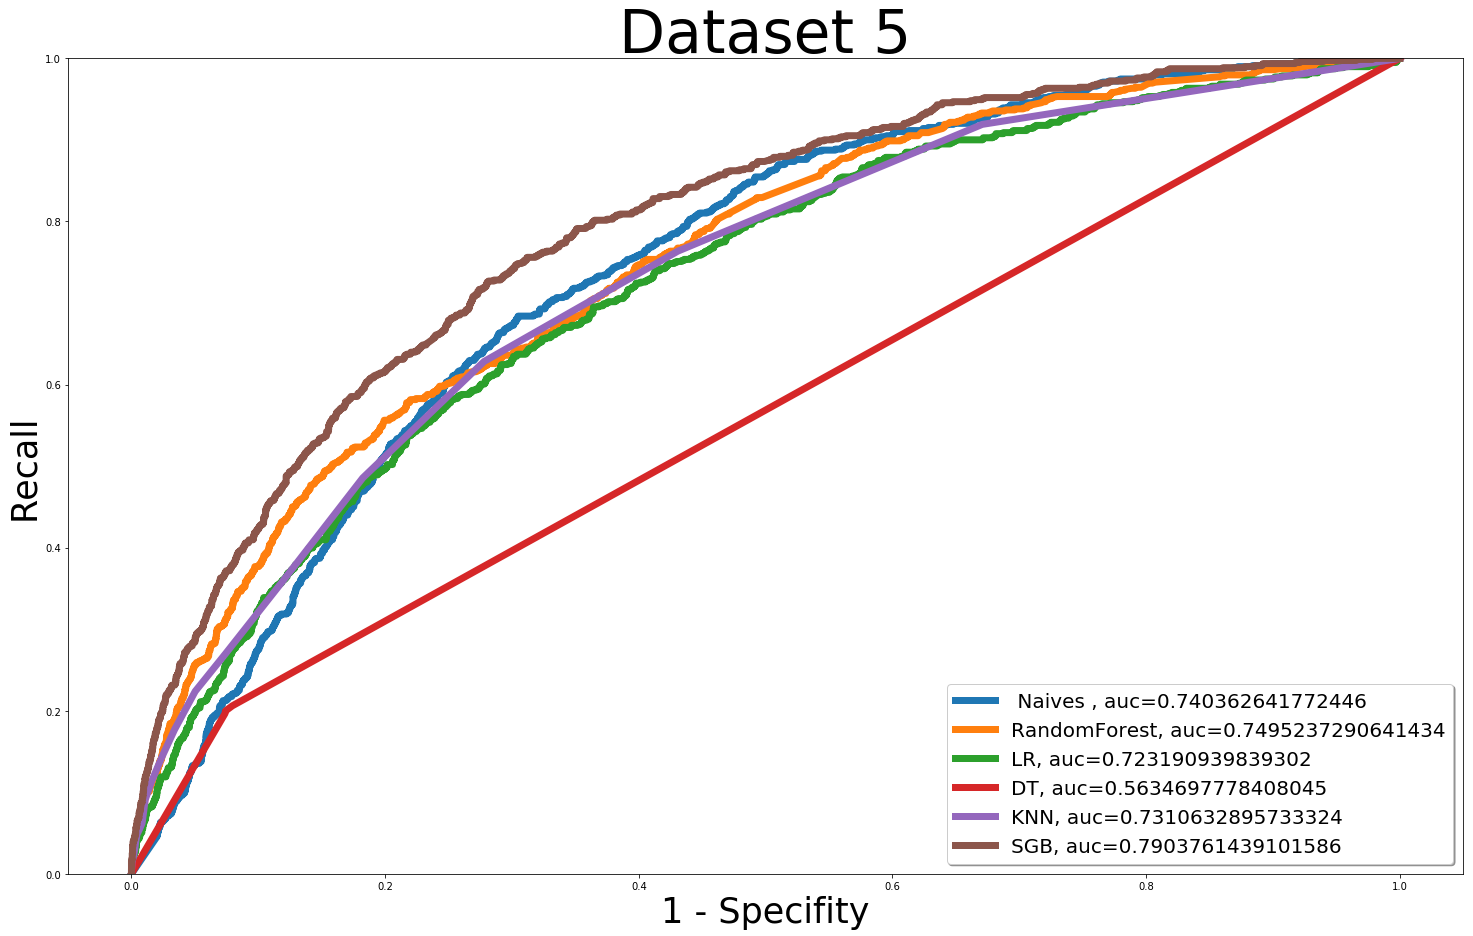

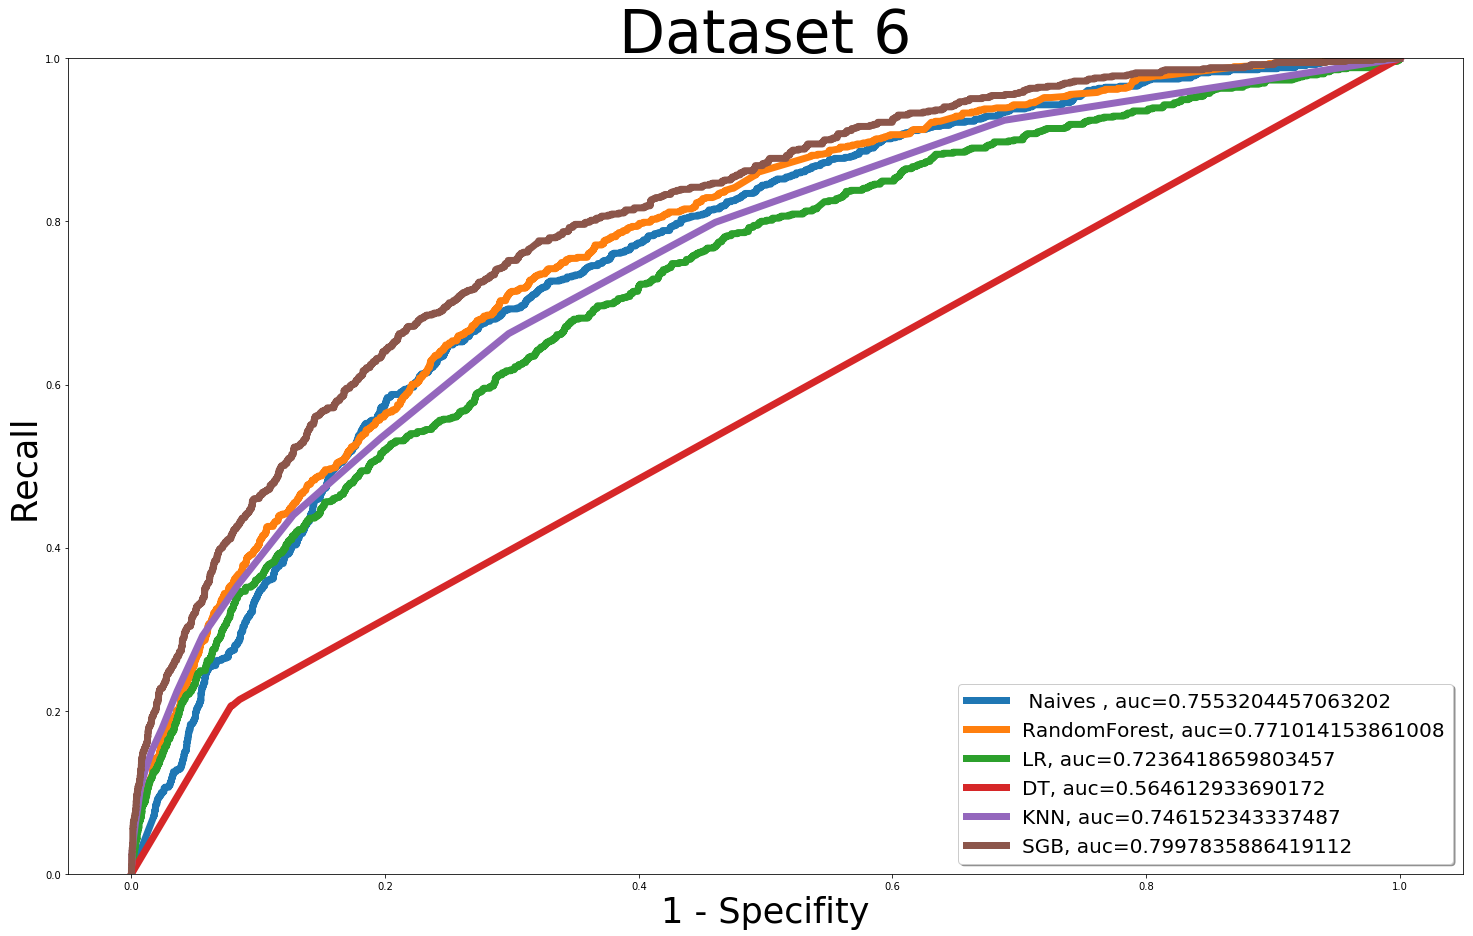

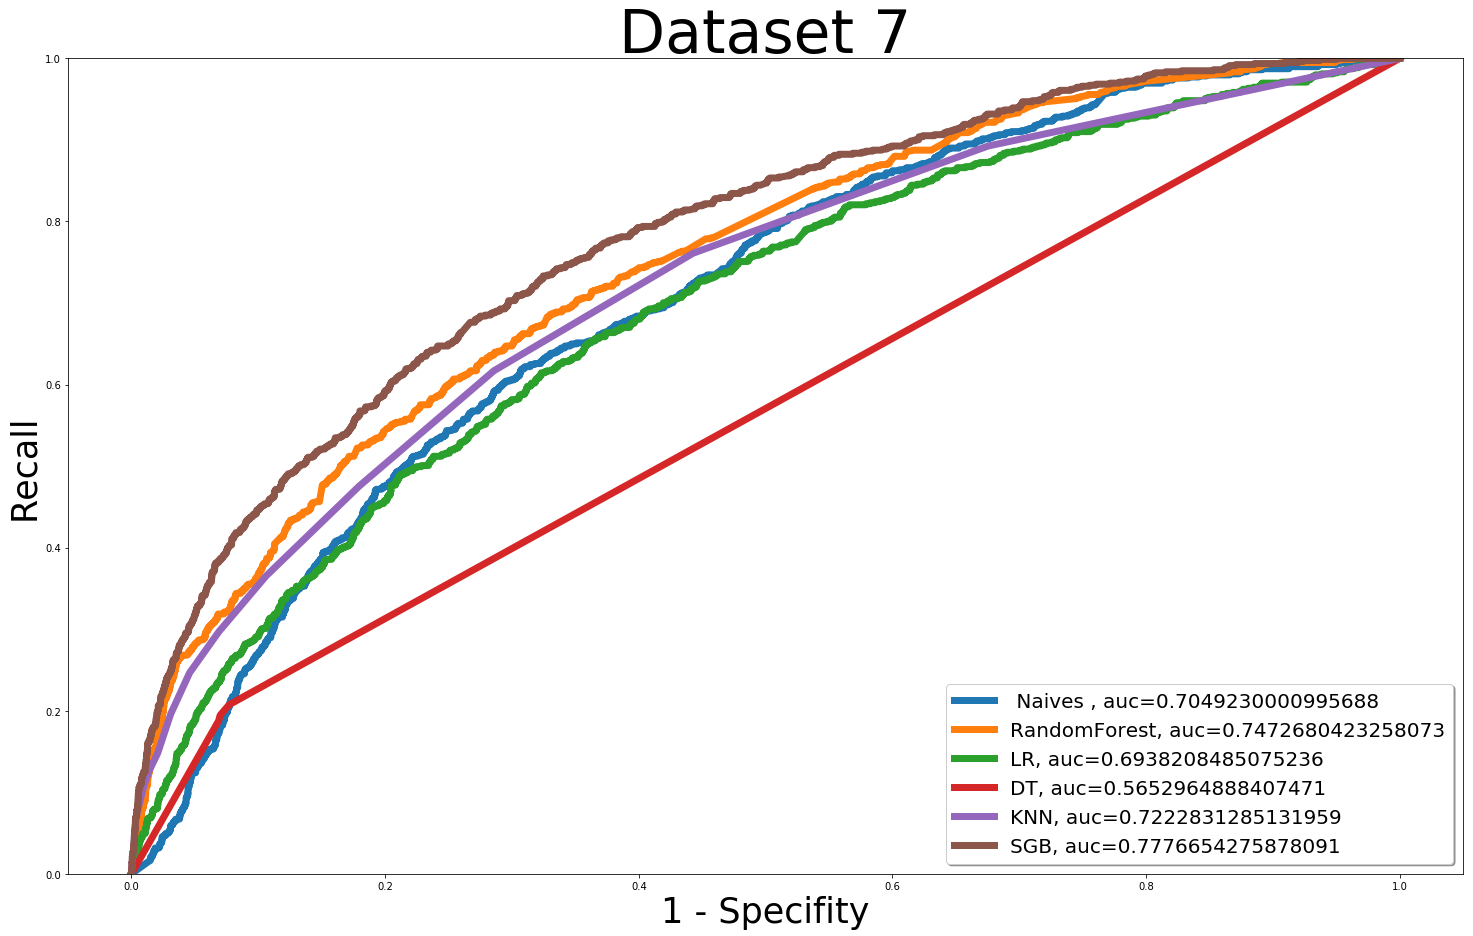

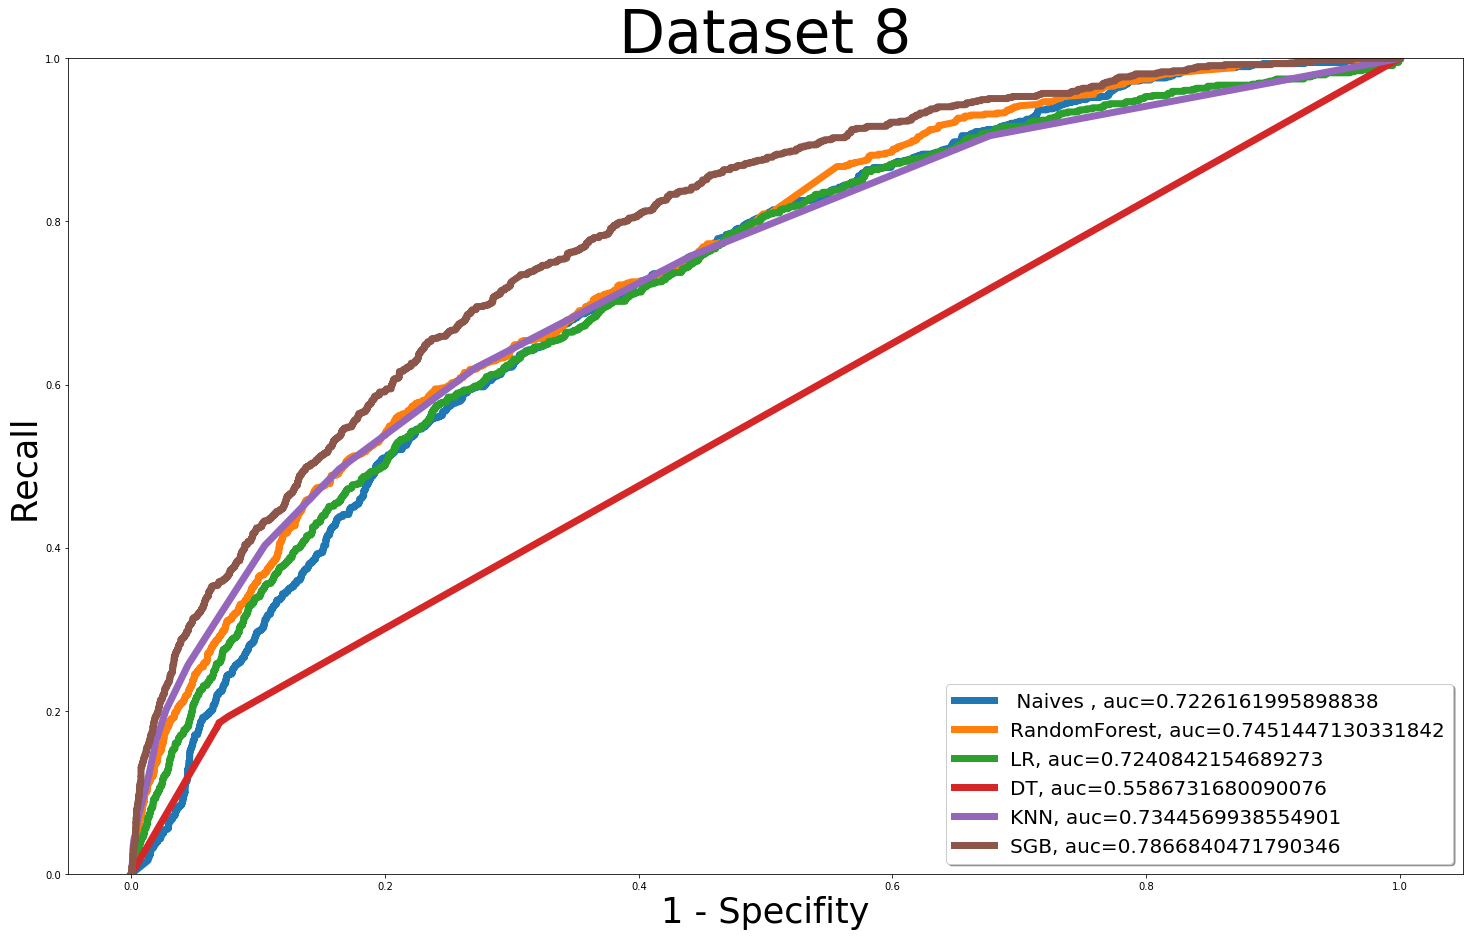

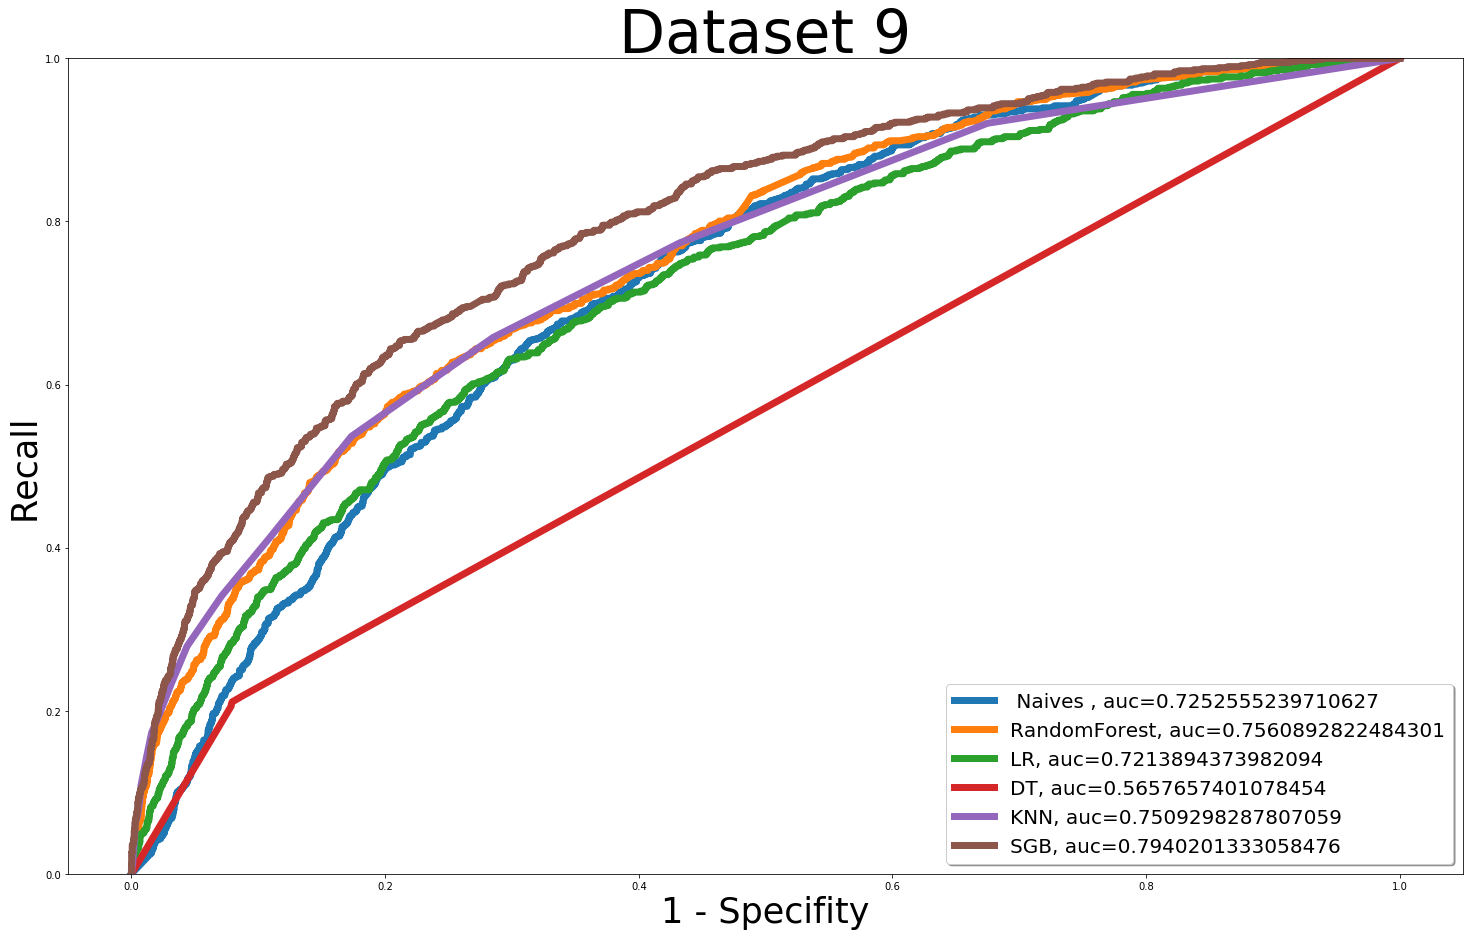

In [64]:
for i in range(len(train_folds)):
    fig, ax = plt.subplots()
    ax.set_ylabel('Recall', fontsize=35)
    plt.ylim(0.00,1,0)
    ax.set_title('Dataset ' + str(i), fontsize=60)
    ax.set_xlabel('1 - Specifity', fontsize=35)
    ax.plot(fpr_NC[i],tpr_NC[i],label=" Naives , auc="+str(auc_NC[i]),linewidth=7)
    ax.plot(fpr_RF[i],tpr_RF[i],label="RandomForest, auc="+str(auc_RF[i]),linewidth=7)
    #plt.plot(fpr_SVM[i],tpr_SVM[i],label="SVM, auc="+str(auc_SVM[i]),linewidth=7)
    ax.plot(fpr_LR[i],tpr_LR[i],label="LR, auc="+str(auc_LR[i]),linewidth=7)
    ax.plot(fpr_DT[i],tpr_DT[i],label="DT, auc="+str(auc_DT[i]),linewidth=7)
    ax.plot(fpr_KNN[i],tpr_KNN[i],label="KNN, auc="+str(auc_KNN[i]),linewidth=7)
    ax.plot(fpr_SGB[i],tpr_SGB[i],label="SGB, auc="+str(auc_SGB[i]),linewidth=7)
    plt.legend(loc='lower right', shadow=True, fontsize=20)
    plt.show()